## CMPE 351 Assignment 2: Image Classification using CNNs

### Data Understanding and Exploration

In [1]:
import pandas as pd
import os # accessing directory structure

# Folder containing Dataset
datasetPath = r"C:/Users/Jade Watson/Documents/CMPE 351/Assignment2//"
print(os.listdir(datasetPath))

['.idea', '351_Assignment_2.pdf', 'Assignment2.ipynb', 'images', 'JadeWatsonAssignment2.ipynb', 'JadeWatsonAssignment2.pdf', 'JadeWatsonAssignment2jw.ipynb', 'Prof Tian', 'test', 'test.csv', 'test_label', 'train', 'train.csv', 'train_label']


In [2]:
# Style Dataframe
df = pd.read_csv(datasetPath + "train.csv", delimiter='\t')
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,imageid,label,productname
0,46908,Bottomwear,Peter England Men White Jeans
1,7394,Shoes,Red Tape Men Black Formal Shoes
2,33055,Topwear,U.S.Polo Assn. Men Check Shirt
3,30525,Innerwear,Lovable Cotton Essensuals Red Bra
4,4336,Shoes,Fila Men's Leonard White Black Shoe
5,55366,Others,Revlon Mocha Express Nail Polish 343
6,11874,Shoes,Franco Leone Men Casual Black Sandals
7,32771,Topwear,Batman Men Printed White T-shirt
8,6377,Shoes,Numero Uno Men's Brown Canvas Shoe
9,50622,Innerwear,Chromozome Men White Brief


We can see that the dataset contains a variety of different clothing images. Specifically, I wish to focus on the subCategory Column. The 13 subcategories defined for the training set are topwear, bottomwear, innerwear, bags, watches, jewellery, eyewear, wallets, shoes, sandal, makeup, fragrance, and other. I wish to classify the dataset images into their appropriate subcategory using a CNN.

#### Split Images Into Test and Training Folders

In [3]:
trainFolder = './train/'
try:
    os.mkdir(trainFolder)
except OSError as error:
    print(error)

[WinError 183] Cannot create a file when that file already exists: './train/'


In [4]:
testFolder = './test/'
try:
    os.mkdir(testFolder)
except OSError as error:
    print(error)

[WinError 183] Cannot create a file when that file already exists: './test/'


In [ ]:
from PIL import Image # used for loading images

for img in os.listdir("./images/"):
    imgFile = Image.open('./images/' + img)
    imgName = img.split('.')[0] # removes the .jpeg in images
    if imgName in df.imageid:
        imgFile.save("./train/" + img)
    else:
        imgFile.save("./test/" + img)

The dataset of images have been split into their respective training and testing folders and are now ready to be formatted to be imported to the Keras model.

### Preparing Labels

In [13]:
testLabelFolder = './test_label'
try:
    os.mkdir(testLabelFolder)
except OSError as error:
    print(error)

[WinError 183] Cannot create a file when that file already exists: './test_label'


In [14]:
trainLabelFolder = './train_label'
try:
    os.mkdir(trainLabelFolder)
except OSError as error:
    print(error)

[WinError 183] Cannot create a file when that file already exists: './train_label'


In [3]:
# train dictionary for imageid: label
labeling_train_dict = {}
f = open(datasetPath + 'train.csv', "r")
fileContents = f.read()
fileContents = fileContents.split('\n')
# Loop through the training csv to match id with its label in respective dictionaries
for i in range(1, len(fileContents)-1):
    fileContents[i] = fileContents[i].split('\t')
    labeling_train_dict[fileContents[i][0]] = fileContents[i][1]

In [4]:
# Build a counting dictionary for each product type to assign labels to images
labels = labeling_train_dict.values()
label_set = set(labels)
counting_train_dict = {}
for i in label_set:
    counting_train_dict[i] = 0

train_ids = labeling_train_dict.keys()

In [19]:
import numpy as np
import imageio # used for writing images

for img in os.listdir('./train'):
    # converts '123456.jpg' --> '123456'
    imgName = img.split('.')[0]
    label = labeling_train_dict[str(imgName)]
    counting_train_dict[label] += 1
    path = os.path.join('./train', img)
    # Name based on how many of each product label has already been counted ('Shoes-1, Shoes-2, ...)
    saveName = './train_label/' + label + '-' + str(counting_train_dict[label]) + '.jpg'
    image_data = np.array(Image.open(path))
    #create new image files with the names ""
    imageio.imwrite(saveName, image_data)

In [5]:
# test dictionary for imageid: label
labeling_test_dict = {}
f = open(datasetPath + 'test.csv', "r")
fileContents = f.read()
fileContents = fileContents.split('\n')
# Loop through the training csv (not including the header row)
# Match id to its label and product name in respective dictionaries
for i in range(1, len(fileContents)-1):
    fileContents[i] = fileContents[i].split('\t')
    labeling_test_dict[fileContents[i][0]] = fileContents[i][1]

In [6]:
# Build a counting dictionary for each product type to assign labels to images
labels = labeling_test_dict.values()
label_set = set(labels)
counting_test_dict = {}
for i in label_set:
    counting_test_dict[i] = 0

train_ids = labeling_test_dict.keys()

In [25]:
import numpy as np
import imageio # used for writing images

for img in os.listdir('./test'):
    # converts '123456.jpg' --> '123456'
    imgName = img.split('.')[0]
    label = labeling_test_dict[str(imgName)]
    counting_test_dict[label] += 1
    path = os.path.join('./test', img)
    # Name based on how many of each product label has already been counted ('Shoes-1, Shoes-2, ...)
    saveName = './test_label/' + label + '-' + str(counting_test_dict[label]) + '.jpg'
    image_data = np.array(Image.open(path))
    #create new image files with the names ""
    imageio.imwrite(saveName, image_data)

### One Hot Encoding Categorical Categories

In [3]:
def label_img(name):
    word_label = name.split('-')[0]
    if word_label == 'Topwear' : return np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    elif word_label == 'Bottomwear' : return np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    elif word_label == 'Innerwear' : return np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    elif word_label == 'Bags' : return np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    elif word_label == 'Watches' : return np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
    elif word_label == 'Jewellery' : return np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
    elif word_label == 'Eyewear' : return np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
    elif word_label == 'Wallets' : return np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
    elif word_label == 'Shoes' : return np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
    elif word_label == 'Sandal' : return np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
    elif word_label == 'Makeup' : return np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
    elif word_label == 'Fragrance' : return np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
    elif word_label == 'Others' : return np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

### Format Images

In [4]:
DIR = './train_label'

In [7]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt

# function used to determine the format to be inputted to a keras model
def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            data = np.array(Image.open(path))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

get_size_statistics()

Average Height: 79.99710689646646
Max Height: 80
Min Height: 60


Average Width: 59.99814544645286
Max Width: 60
Min Width: 53


It is evident that the average height is 80 and the average width is 60. Thus, we want to resize all the images to 80x60.

In [8]:
imgHeight = 80
imgWidth = 60

def load_training_data():
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((imgHeight, imgWidth), Image.ANTIALIAS)
            train_data.append([np.array(img), label])

    shuffle(train_data)
    return train_data

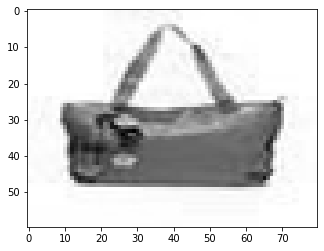

In [9]:
train_data = load_training_data()
plt.imshow(train_data[54][0], cmap='gist_gray')

In [10]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, imgHeight, imgWidth, 1)
trainLabels = np.array([i[1] for i in train_data])

In [11]:
print(trainImages.shape)
print(trainLabels.shape)

(40441, 80, 60, 1)
(40441, 13)


### Create CNN

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(imgHeight, imgWidth, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(13, activation = 'softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [18]:
model.fit(trainImages, trainLabels, batch_size = 50, epochs = 5, verbose = 1)
validation_data = (trainImages,trainLabels)

Epoch 1/5
809/809 [==============================] - 232s 283ms/step - loss: 2.6601 - accuracy: 0.7730
Epoch 2/5
809/809 [==============================] - 204s 252ms/step - loss: 0.6294 - accuracy: 0.8075
Epoch 3/5
809/809 [==============================] - 209s 259ms/step - loss: 0.5908 - accuracy: 0.8192
Epoch 4/5
809/809 [==============================] - 230s 284ms/step - loss: 0.5555 - accuracy: 0.8289
Epoch 5/5
809/809 [==============================] - 173s 214ms/step - loss: 0.4998 - accuracy: 0.8455


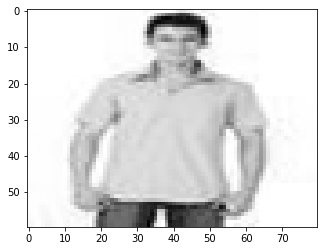

In [19]:
# Test on Test Set
TEST_DIR = './test_label'
def load_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((imgHeight, imgWidth), Image.ANTIALIAS)
            test_data.append([np.array(img), label])
    shuffle(test_data)
    return test_data

test_data = load_test_data()
plt.imshow(test_data[10][0], cmap = 'gist_gray')

In [25]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, imgHeight, imgWidth, 1)
testLabels = np.array([i[1] for i in test_data])

loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print("Simple CNN accuracy on test:")
print(acc * 100)

Simple CNN accuracy on test:
84.0250015258789


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 58, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 29, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 27, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14976)             0         
                                                                 
 dense (Dense)               (None, 13)                1

In [23]:
# Accuracy on training data
train_data = load_training_data()
trainImages = np.array([i[0] for i in train_data]).reshape(-1, imgHeight, imgWidth, 1)
trainLabels = np.array([i[1] for i in train_data])

loss, acc = model.evaluate(trainImages, trainLabels, verbose = 0)
print("Simple CNN accuracy on training:")
print(acc * 100)

Simple CNN accuracy on training:
85.32429933547974


### Improved Image Classification

#### Method 1: Tuning of the parameters

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(imgHeight, imgWidth, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(13, activation = 'sigmoid'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [15]:
model.fit(trainImages, trainLabels, batch_size = 50, epochs = 5, verbose = 1)
validation_data = (trainImages,trainLabels)

Epoch 1/5
809/809 [==============================] - 233s 285ms/step - loss: 0.6366 - accuracy: 0.8041
Epoch 2/5
809/809 [==============================] - 251s 311ms/step - loss: 0.3798 - accuracy: 0.8832
Epoch 3/5
809/809 [==============================] - 251s 310ms/step - loss: 0.3182 - accuracy: 0.8998
Epoch 4/5
809/809 [==============================] - 170s 210ms/step - loss: 0.2808 - accuracy: 0.9127
Epoch 5/5
809/809 [==============================] - 178s 220ms/step - loss: 0.2564 - accuracy: 0.9180


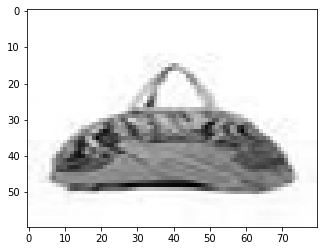

In [16]:
# Test on Test Set
TEST_DIR = './test_label'
def load_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((imgHeight, imgWidth), Image.ANTIALIAS)
            test_data.append([np.array(img), label])
    shuffle(test_data)
    return test_data

test_data = load_test_data()
plt.imshow(test_data[10][0], cmap = 'gist_gray')

In [17]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, imgHeight, imgWidth, 1)
testLabels = np.array([i[1] for i in test_data])

loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)

89.0999972820282


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 58, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 29, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 39, 29, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 27, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 13, 64)       0         
 2D)                                                             
                                                        

### Method 2: Data Augmentation

In [65]:
imgHeight = 80
imgWidth = 60

def load_training_data():
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        img = Image.open(path)
        img = img.convert('L')
        img = img.resize((imgHeight, imgWidth), Image.ANTIALIAS)
        train_data.append([np.array(img), label])
        # Basic Data Augmentation - Horizontal Flipping
        flip_img = Image.open(path)
        flip_img = flip_img.convert('L')
        flip_img = flip_img.resize((imgHeight, imgWidth), Image.ANTIALIAS)
        flip_img = np.array(flip_img)
        flip_img = np.fliplr(flip_img)
        train_data.append([flip_img, label])
    shuffle(train_data)
    return train_data

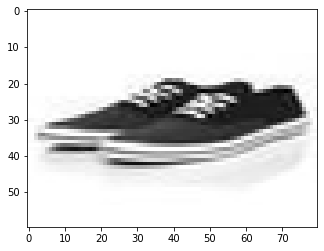

In [66]:
train_data = load_training_data()
plt.imshow(train_data[54][0], cmap='gist_gray')

In [67]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, imgHeight, imgWidth, 1)
trainLabels = np.array([i[1] for i in train_data])

In [68]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(imgHeight, imgWidth, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(13, activation = 'softmax'))

In [69]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [70]:
model.fit(trainImages, trainLabels, batch_size = 50, epochs = 5, verbose = 1)
validation_data = (trainImages,trainLabels)

Epoch 1/5
1618/1618 [==============================] - 296s 182ms/step - loss: 0.1549 - accuracy: 0.7833
Epoch 2/5
1618/1618 [==============================] - 310s 192ms/step - loss: 0.0754 - accuracy: 0.8454
Epoch 3/5
1618/1618 [==============================] - 307s 190ms/step - loss: 0.0615 - accuracy: 0.8771
Epoch 4/5
1618/1618 [==============================] - 305s 188ms/step - loss: 0.0524 - accuracy: 0.8961
Epoch 5/5
1618/1618 [==============================] - 306s 189ms/step - loss: 0.0476 - accuracy: 0.9076


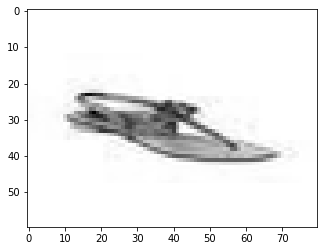

In [71]:
# Test on Test Set
TEST_DIR = './test_label'
def load_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((imgHeight, imgWidth), Image.ANTIALIAS)
            test_data.append([np.array(img), label])
    shuffle(test_data)
    return test_data

test_data = load_test_data()
plt.imshow(test_data[10][0], cmap = 'gist_gray')

In [72]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, imgHeight, imgWidth, 1)
testLabels = np.array([i[1] for i in test_data])

loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)

90.20000100135803
